<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Acquire-Store-df-Using-Acquire-Function" data-toc-modified-id="Acquire-Store-df-Using-Acquire-Function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Acquire Store df Using Acquire Function</a></span></li><li><span><a href="#Exercises-with-Store-df" data-toc-modified-id="Exercises-with-Store-df-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercises with Store df</a></span></li><li><span><a href="#Date-Parts" data-toc-modified-id="Date-Parts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Date Parts</a></span></li><li><span><a href="#5.-Create-New-Calculated-Column-Using-.assign()" data-toc-modified-id="5.-Create-New-Calculated-Column-Using-.assign()-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>5. Create New Calculated Column Using .assign()</a></span></li><li><span><a href="#6.-Using-.diff()" data-toc-modified-id="6.-Using-.diff()-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>6. Using .diff()</a></span></li><li><span><a href="#7.-Build-Functions" data-toc-modified-id="7.-Build-Functions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>7. Build Functions</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

import requests
import os
from datetime import timedelta, datetime as dt

import warnings
warnings.filterwarnings("ignore")

from acquire_walkthrough import get_store_data

## Acquire Store df Using Acquire Function

In [ ]:
df = get_store_data()
df.head()

## Exercises with Store df

1. Convert date column to datetime format. <font color=red>(I have taken care of this in my acquire.)</font>



3. Set the index to be the datetime variable. <font color=red>(I have taken care of this in my acquire.)</font>



2. Plot the distribution of `sale_amount` and `item_price`.

In [ ]:
df.item_price.describe()

In [ ]:
def hist_plot(df, col, bins):
    """
    function takes in a DataFrame, 
    a string for column name or list, and 
    integer for number of bins and
    displays a histogram of the column
    """
    plt.hist(df[col], bins=bins, color='thistle')
    plt.title('Distribution of ' + col)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.show()

In [ ]:
hist_plot(df=df, col='item_price', bins=20)

In [ ]:
hist_plot(df=df, col='sale_amount', bins=30)

## Date Parts

4. Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.


<div class="alert alert-block alert-danger"> If you have upgraded your pandas, use .day_name(), if not, .weekday_name. To check your pandas version, `pd.__version__` </div>


In [ ]:
df['month'] = df.index.month
df['weekday'] = df.index.day_name()
df.head(2)

## 5. Create New Calculated Column Using .assign()

`df = df.assign(new_col_name = your calculation)`

5. Add a column to your dataframe, `sales_total`, which is a derived from `sale_amount` (total items) and `item_price`.

In [ ]:
df = df.assign(sales_total = df.sale_amount * df.item_price)
df.head(3)

## 6. Using .diff()

6. Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.


In [ ]:
df = df.assign(sales_diff = df.sales_total.diff(periods=1))
df.head(2)

## 7. Build Functions

In [ ]:
# I'm going to take care of changing some data types here

df = df.astype({'sale_id': object, 'store_id': object, 'store_zipcode': object, 'item_id': object, 'item_upc12': object, 'item_upc14': object, 'month': 'category', 'weekday': 'category'})

In [ ]:
df.info()

In [2]:
def numeric_hists(df):
    """
    Function to select only numeric dtypes and
    display histograms for each numeric column
    """
    num_df = df.select_dtypes(include=['int64', 'float64'])
    num_df.hist(color='thistle')
    plt.suptitle('Numeric Column Distributions')
    plt.show()

In [ ]:
numeric_hists(df)

In [5]:
def prepped_store_df():
    """
    Function to acquire and prepare
    store dataframe and show
    distributions for numeric columns
    """
    # Acquire the df
    df = get_store_data()
    
    # Create date part columns
    df['month'] = df.index.month
    df['weekday'] = df.index.day_name()
    
    # Create calculated columns
    df = df.assign(sales_total = df.sale_amount * df.item_price)
    df = df.assign(sales_diff = df.sales_total.diff(periods=1))
    
    # Change dtypes of numeric columns to object and category
    df = (df.astype({'sale_id': object, 'store_id': object, 
                     'store_zipcode': object, 'item_id': object, 
                     'item_upc12': object, 'item_upc14': object, 
                     'month': 'category', 'weekday': 'category'}))
    
    # Display distributions of numeric columns
    numeric_hists(df)
    
    return df

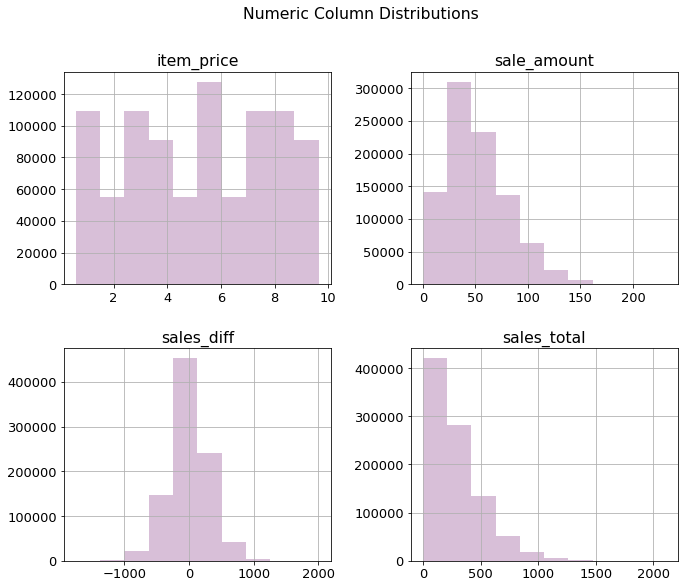

In [6]:
df = prepped_store_df()